In [27]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import os

In [28]:
# fpath = "/nfs/kun2/users/dibya/gc_pretraining/buffers/franka_kitchen/kitchen_micro_open-v3.pickle"
fpath = "/nfs/kun2/users/dibya/gc_pretraining/buffers/r3m_dibya/final_paths_multiview_rb_200/left_cap2/kitchen_micro_open-v3.pickle"
ds = pickle.load(open(fpath, 'rb'))
traj1 = ds[0]
img_traj = traj1['images']
N = len(img_traj)
rews = traj1['rewards']
print(traj1.keys())
print(traj1['env_infos'].keys())
print(traj1['env_infos']['solved'], len(traj1['env_infos']['solved']))

dict_keys(['observations', 'actions', 'rewards', 'env_infos', 'init_state_dict', 'images'])
dict_keys(['time', 'rwd_dense', 'rwd_sparse', 'solved', 'done', 'obs_dict', 'rwd_dict', 'env_state'])
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True] 50


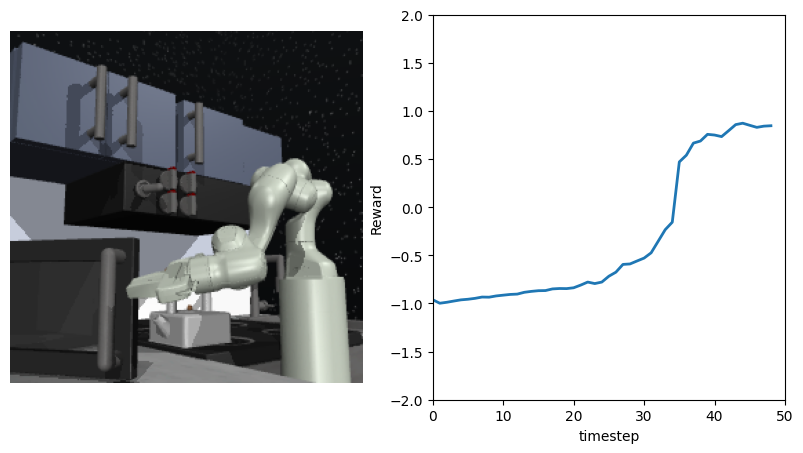

In [29]:
# show a video of the trajectory along with a plot of the icvf
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_axis_off()
ax[1].set_xlim(0, N)
ax[1].set_ylim(-2, 2)
ax[1].set_xlabel("timestep")
ax[1].set_ylabel("Reward")
im = ax[0].imshow(img_traj[0])
line, = ax[1].plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,
def animate(i):
    im.set_array(img_traj[i])
    line.set_data(np.arange(i), rews[:i])
    return line,
ani = animation.FuncAnimation(fig, animate, frames=N, init_func=init, blit=True)
HTML(ani.to_jshtml())

In [31]:
datadict = {}
obses = []
next_obses = []
dones = []
actions = []
rewards = []
for traj in ds:
    obs = traj['images'][:-1]
    next_obs = traj['images'][1:]
    action = traj['actions'][:-1]
    reward = traj['env_infos']['solved'][:-1].astype(np.float32)
    done = np.zeros_like(reward)
    done[-1] = 1.0
    obses.append(obs)
    next_obses.append(next_obs)
    actions.append(action)
    rewards.append(reward)
    dones.append(done)
datadict['observations'] = np.concatenate(obses)
datadict['next_observations'] = np.concatenate(next_obses)
datadict['actions'] = np.concatenate(actions)
datadict['rewards'] = np.concatenate(rewards)
datadict['dones_float'] = np.concatenate(dones)
path = "/nfs/kun2/users/dashora7/franka_datasets"
np.save(os.path.join(path, "dibya_micro_open.npy"), datadict, allow_pickle=True)
    

In [ ]:
from envs import KitchenEnv